# Decision Tree Implementation From Scratch

## Importing Necessary Libraries

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
from sklearn import datasets
data = datasets.load_iris()
X, y = data.data, data.target

## Importing Dataset into Training, Cross Validation and Test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_CV, y_test, y_CV = train_test_split(X_, y_, test_size = 0.5, random_state = 42)

## Defining Node Class

In [4]:
class Node(object):
    def __init__(self, feature = None, threshold = None, left = None, right = None, value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None

## Defining Decision Tree Class

In [5]:
class DecisionTree(object):
    def __init__(self, min_samples_split = 2, max_depth = 100, n_features = None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
    
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))
        
        if (depth >= self.max_depth or n_samples < self.min_samples_split or n_labels == 1):
            leaf_value = self._most_common_label(y)
            return Node(value = leaf_value)
        
        feat_idxs = np.random.choice(n_feats, self.n_features, replace = False)
        best_feature, best_threshold = self._best_split(X, y, feat_idxs)
        
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs,:], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs,:], y[right_idxs], depth+1)
        return Node(feature = best_feature, threshold = best_threshold, left = left, right = right)
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        
        for feat in feat_idxs:
            thresholds = np.unique(X[:, feat])
            for thr in thresholds:
                information_gain = self._calculate_information_gain(X[:, feat], y, thr)
                if information_gain > best_gain:
                    best_gain = information_gain
                    best_feature_idx = feat
                    best_threshold = thr
        
        return best_feature_idx, best_threshold
    
    def _calculate_information_gain(self, X_column, y, threshold):
        
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        parent_entropy = self._entropy(y)
        childs_weighted_entropy = (len(left_idxs) / len(y)) * self._entropy(y[left_idxs]) + (len(right_idxs) / len(y)) * self._entropy(y[right_idxs])
        information_gain = parent_entropy - childs_weighted_entropy
        return information_gain
    
    def _split(self, X_column, threshold):
        left_idxs = [i for i, x in enumerate(X_column) if x < threshold]
        right_idxs = [i for i, x in enumerate(X_column) if x >= threshold]
        return left_idxs, right_idxs
   
    def _entropy(self, y):
        counts = np.unique(y, return_counts = True)[1]
        probability = counts / len(y)
        return -np.sum(probability*np.log2(probability))
        
    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        else:
            if x[node.feature] <= node.threshold:
                return self._traverse_tree(x, node.left)
            return self._traverse_tree(x, node.right)

## Instantiating and Fitting the model

In [6]:
clf = DecisionTree()
clf.fit(X_train, y_train)

## Predicting Results

In [7]:
y_train_pred = clf.predict(X_train)
y_CV_pred = clf.predict(X_CV)
y_test_pred = clf.predict(X_test)

## Evaluating Model Performance and Displaying Confusion Matrix

Training set accuracy         % 90.0
Cross validation set accuracy % 96.66666666666667
Test set accuracy             % 93.33333333333333


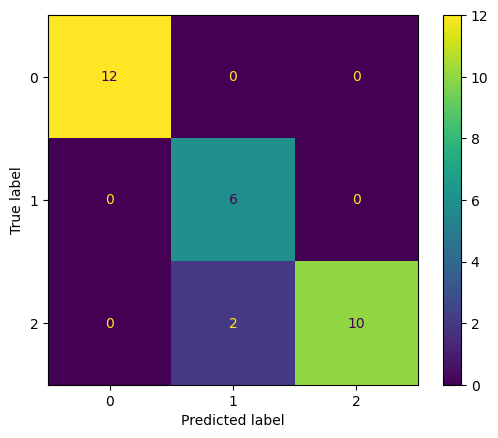

In [8]:
from sklearn import metrics
print("Training set accuracy         %", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Cross validation set accuracy %", metrics.accuracy_score(y_CV, y_CV_pred) * 100)
print("Test set accuracy             %", metrics.accuracy_score(y_test, y_test_pred) * 100)

cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()